In [1]:
import os
os.getcwd()

'/workspaces/Visualization'

In [2]:
mapping_colnames = {'Homocystéine (µmol/L)' : 'Homocystéine',
'TSH (mUI/L)' : 'TSH',
'Ferritine (µg/L)' : 'Ferritine',
'LBP (µg/mL)': 'LBP',
'Vitamine D (ng/mL)' : 'VitamineD'}
import pandas as pd
df = pd.read_csv('peggy/data/peggy_clean.csv')

In [60]:
df = df.rename(columns=mapping_colnames)

In [61]:
mapping_colnames.keys()

dict_keys(['Homocystéine (µmol/L)', 'TSH (mUI/L)', 'Ferritine (µg/L)', 'LBP (µg/mL)', 'Vitamine D (ng/mL)'])

In [62]:
df

,Année,Mois,Homocystéine,TSH,Ferritine,LBP,VitamineD
0,2024,10-Octobre,8.3,1.86,51.0,7.4,17.0
1,2024,10-Octobre,11.1,1.14,24.0,14.0,19.0
2,2024,10-Octobre,8.9,0.98,430.0,6.1,23.0
3,2024,10-Octobre,18.7,1.12,99.0,14.1,12.0
4,2024,10-Octobre,18.1,1.21,78.0,14.3,134.0
...,...,...,...,...,...,...,...
422,2025,05-Mai,10.1,1.38,99.0,4.3,21.0
423,2025,05-Mai,4.3,1.40,396.0,2.3,37.0
424,2025,05-Mai,2.8,1.62,49.0,2.6,17.0
425,2025,05-Mai,9.6,2.24,127.0,3.9,78.0


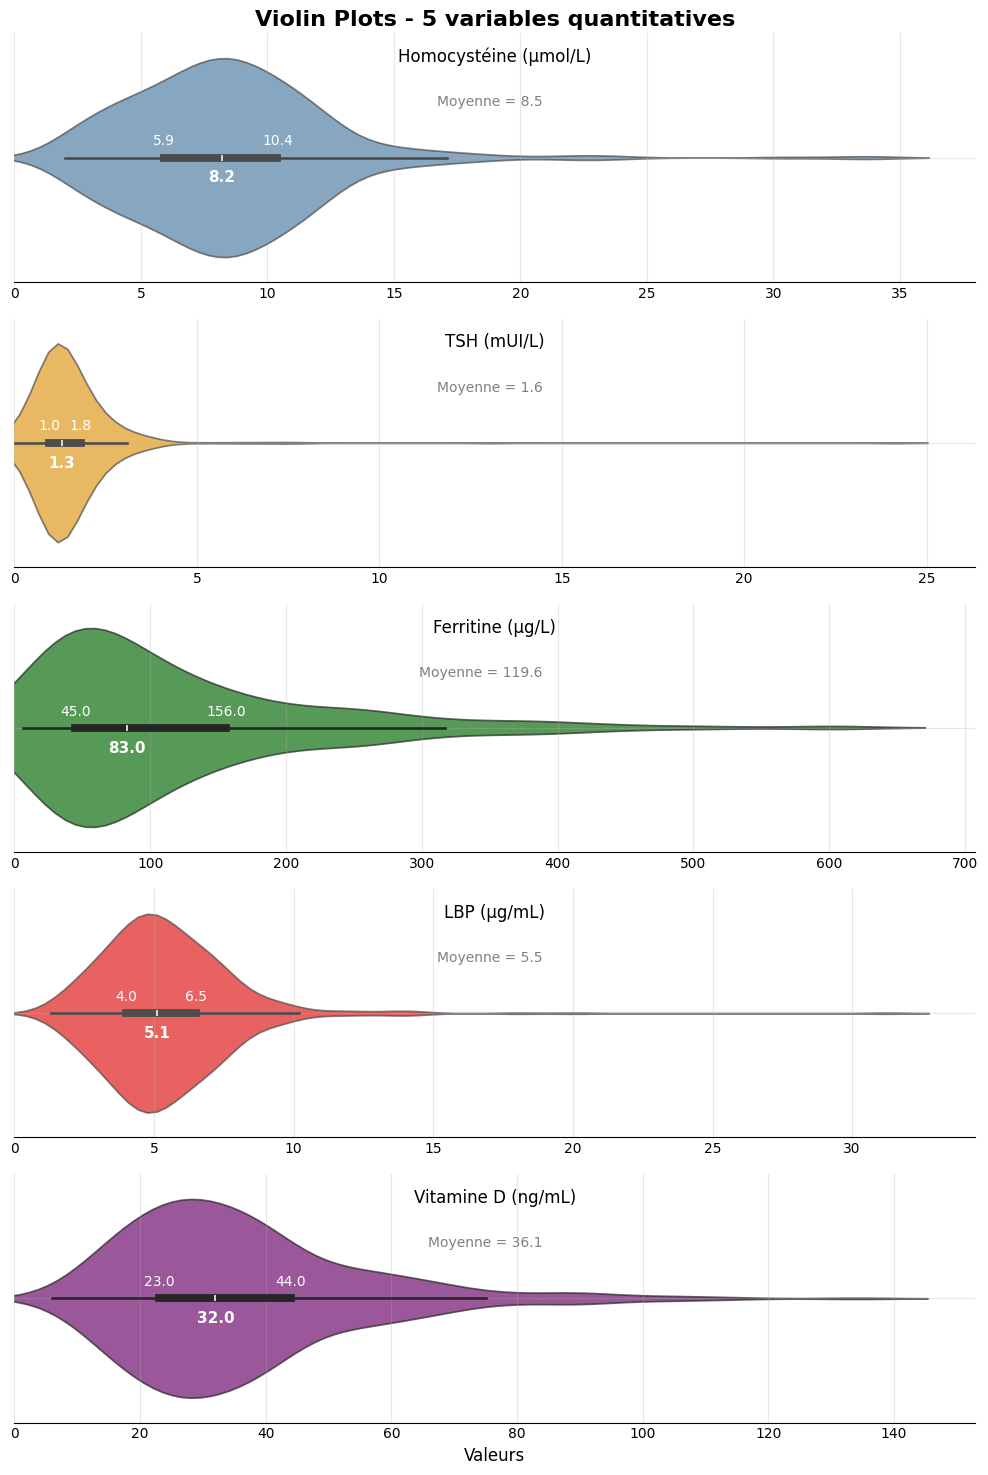

In [95]:
import matplotlib.pyplot as plt
import seaborn as sns

variables = ['Homocystéine', 'TSH', 'Ferritine', 'LBP', 'VitamineD']
name_variables = ['Homocystéine (µmol/L)', 'TSH (mUI/L)', 'Ferritine (µg/L)', 'LBP (µg/mL)', 'Vitamine D (ng/mL)']
colors = ['steelblue', 'orange', 'green', 'red', 'purple']

# Créer 5 subplots verticaux
fig, axes = plt.subplots(5, 1, figsize=(10, 15), layout="tight")
plt.subplots_adjust(hspace=0.6, top=0.75)
fig.suptitle('Violin Plots - 5 variables quantitatives', fontsize=16, fontweight='bold')

for i, (var, color) in enumerate(zip(variables, colors)):
    mean_val = df[var].mean()
    median_val = df[var].median()
    q1 = df[var].quantile(0.25)
    q3 = df[var].quantile(0.75)
    
    sns.violinplot(data=df, x=var, ax=axes[i], color=color, alpha=0.7)
    axes[i].set_xlim(0, None)  # Force l'axe x à commencer à 0
    # Si vous utilisez un violin plot horizontal :
    sns.violinplot(data=df, x=var, ax=ax, color=color, alpha=0.7, cut=0)
    axes[i].set_xlim(0, None)  # Force à commencer à 0

    axes[i].set_title(f'{name_variables[i]}', fontsize=12, y=0.85)

    
    axes[i].set_xlabel('')
    axes[i].grid(True, alpha=0.3)
    
    axes[i].text(s=round(median_val,1),
                x=median_val,
                y=0 + 0.1,
                ha="center",
                color="white",
                weight="bold",
                size=11)
    
    axes[i].text(s=round(q1,1),
                x=q1,
                y=0 - 0.05,
                ha="center",
                color="white",
                weight="normal",
                size=10)
    
    axes[i].text(s=round(q3,1),
                x=q3,
                y=0 - 0.05,
                ha="center",
                color="white",
                weight="normal",
                size=10)
    # Remplacer la ligne d'annotation par :
    axes[i].text(0.55, 0.75, f'Moyenne = {round(mean_val, 1)}', 
            transform=axes[i].transAxes,
            ha="right", va="top",
            fontsize=10, fontweight='normal',
            color='gray')
    
    axes[i].spines[["top","left","right"]].set_visible(False)
    axes[i].set_yticklabels([])
    axes[i].tick_params(length=0)

# Label x seulement pour le dernier
axes[-1].set_xlabel('Valeurs', fontsize=12)

plt.tight_layout()
plt.savefig('distribution.png')

plt.show()

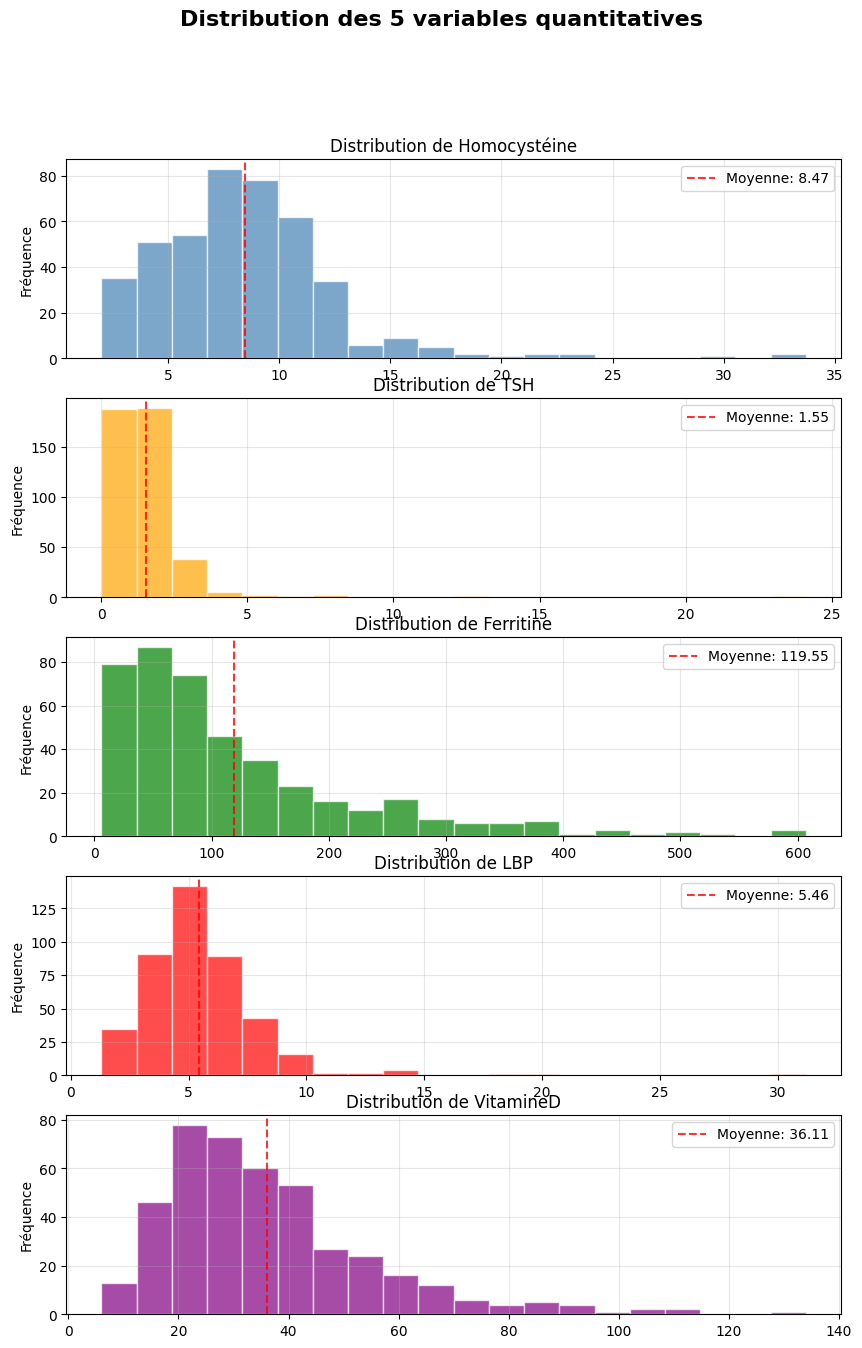

In [68]:
import matplotlib.pyplot as plt
import numpy as np

# Vos 5 variables (ajustez les noms selon vos colonnes)
variables = mapping_colnames.values()



colors = ['steelblue', 'orange', 'green', 'red', 'purple']

# Créer 5 subplots verticaux
fig, axes = plt.subplots(5, 1, figsize=(10, 15))
fig.suptitle('Distribution des 5 variables quantitatives', fontsize=16, fontweight='bold')

# Créer un histogramme pour chaque variable
for i, (ax, var) in enumerate(zip(axes, variables)):
    ax.hist(df[var], bins=20, alpha=0.7, color=colors[i], edgecolor='white')
    ax.set_title(f'Distribution de {var}', fontsize=12)
    ax.set_ylabel('Fréquence')
    ax.grid(True, alpha=0.3)
    
    # Ajouter des statistiques
    mean_val = df[var].mean()
    ax.axvline(mean_val, color='red', linestyle='--', alpha=0.8, label=f'Moyenne: {mean_val:.2f}')
    ax.legend()

# Label x seulement pour

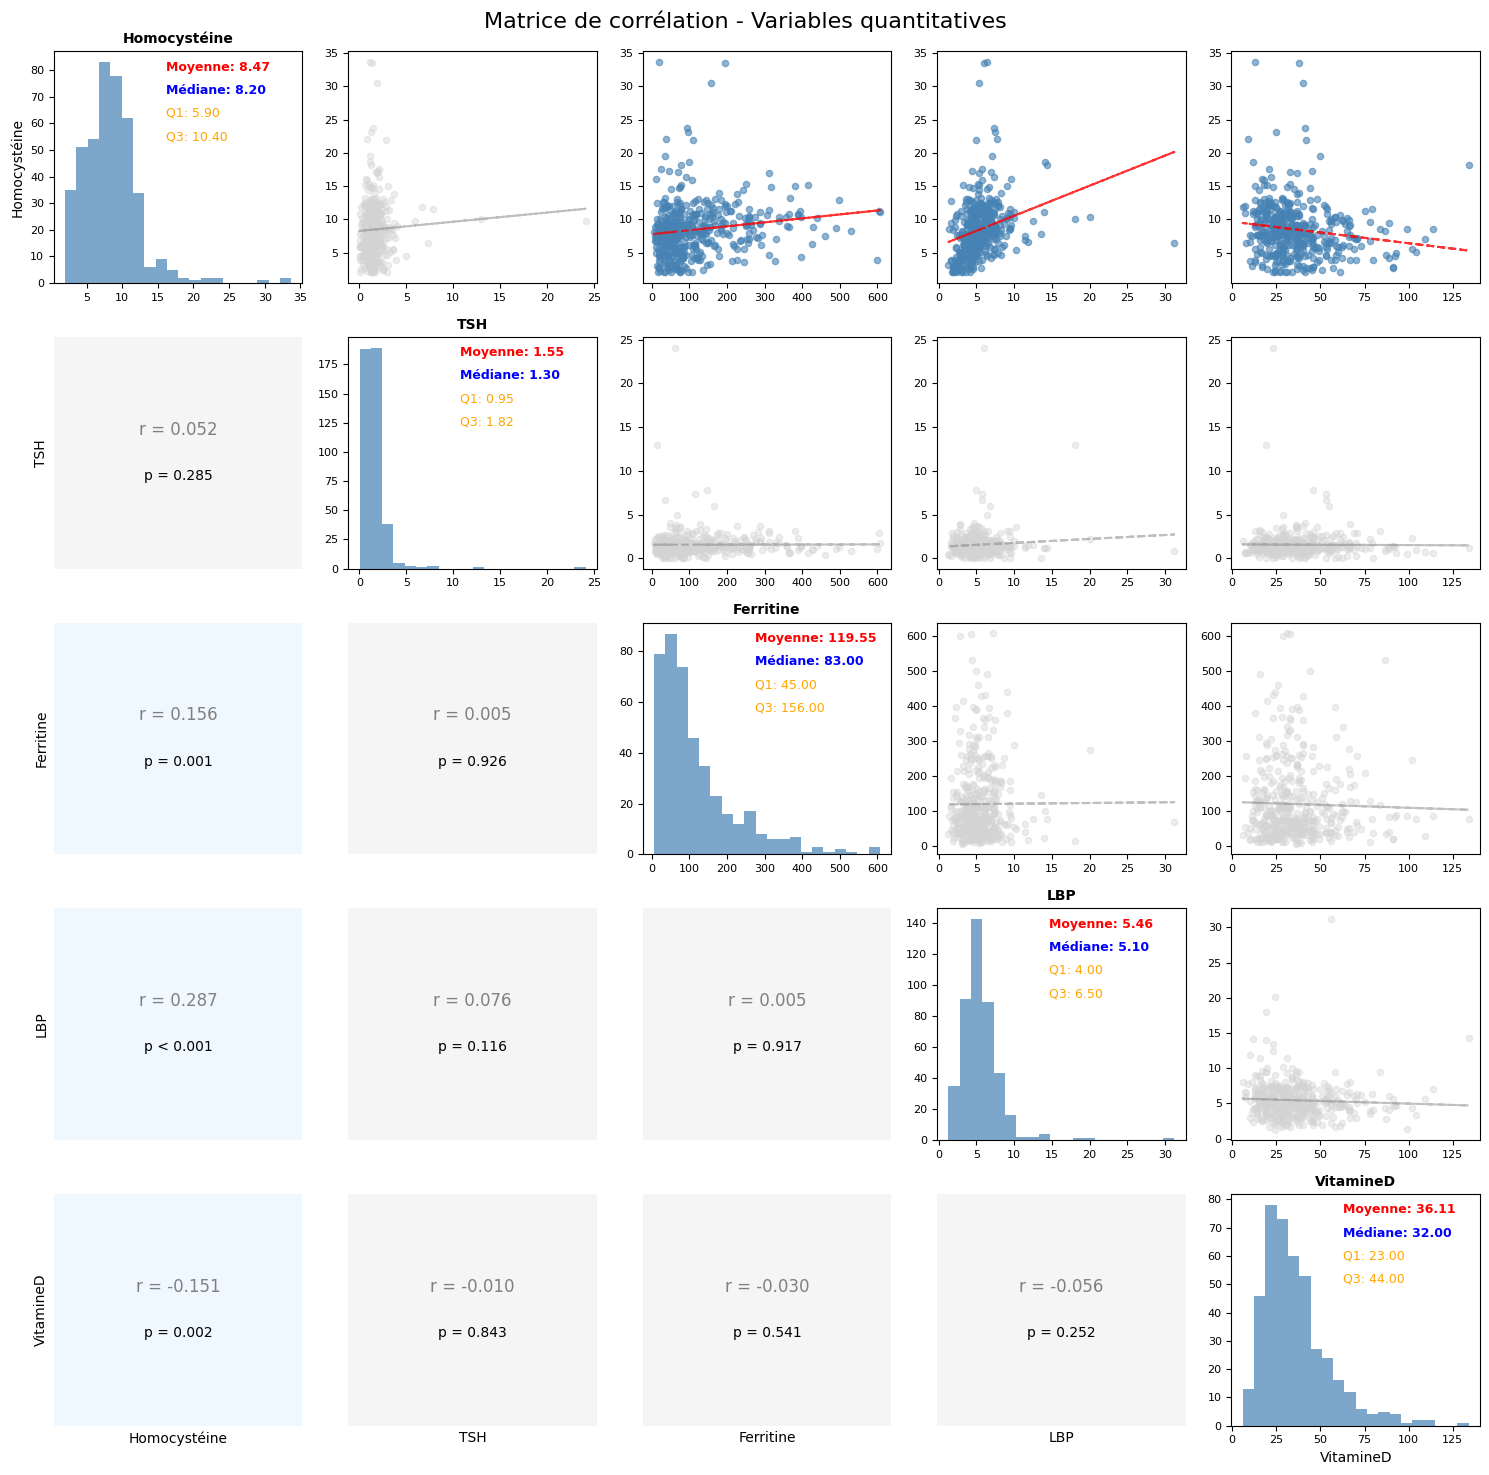

In [88]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr

# Vos 5 variables
variables = ['Homocystéine', 'TSH', 'Ferritine', 'LBP', 'VitamineD']
n_vars = len(variables)

# Créer la matrice de subplots
fig, axes = plt.subplots(n_vars, n_vars, figsize=(15, 15))
plt.subplots_adjust(hspace=0, wspace=0)  # Ajustez ces valeurs selon vos besoins

fig.suptitle('Matrice de corrélation - Variables quantitatives', fontsize=16)

for i in range(n_vars):
    for j in range(n_vars):
        ax = axes[i, j]
        
        if i == j:
            data = df[variables[i]].dropna()
            
            # Créer l'histogramme
            ax.hist(data, bins=20, alpha=0.7, color='steelblue')
            ax.set_title(f'{variables[i]}', fontsize=10, fontweight='bold')
            
            # Calculer les statistiques
            mean_val = data.mean()
            median_val = data.median()
            q1 = data.quantile(0.25)
            q3 = data.quantile(0.75)
            pos_x = 0.45
            pos_y = 0.96
            # Ajouter seulement les valeurs textuelles (sans lignes)
            ax.text(pos_x, pos_y, f'Moyenne: {mean_val:.2f}', 
                   transform=ax.transAxes, fontsize=9, 
                   color='red', fontweight='bold', va='top')
            
            ax.text(pos_x, pos_y - 0.1, f'Médiane: {median_val:.2f}', 
                   transform=ax.transAxes, fontsize=9, 
                   color='blue', fontweight='bold', va='top')
            
            ax.text(pos_x, pos_y - 0.2, f'Q1: {q1:.2f}', 
                   transform=ax.transAxes, fontsize=9, 
                   color='orange', va='top')
            
            ax.text(pos_x, pos_y - 0.3, f'Q3: {q3:.2f}', 
                   transform=ax.transAxes, fontsize=9, 
                   color='orange', va='top')
        elif i > j:
            # Triangle inférieur: coefficients de corrélation et p-values
            
            # Calculer la corrélation et p-value
            correlation, p_value = pearsonr(df[variables[j]], df[variables[i]])
            
            # Enlever tous les éléments visuels
            ax.set_xticks([])
            ax.set_yticks([])
            ax.spines['top'].set_visible(False)
            ax.spines['right'].set_visible(False)
            ax.spines['bottom'].set_visible(False)
            ax.spines['left'].set_visible(False)
            
            # Couleur selon la force de la corrélation
            if abs(correlation) >= 0.7:
                color = 'darkgreen'
                weight = 'bold'
            elif abs(correlation) >= 0.5:
                color = 'orange'
                weight = 'bold'
            elif abs(correlation) >= 0.3:
                color = 'red'
                weight = 'normal'
            else:
                color = 'gray'
                weight = 'normal'
            
            # Afficher le coefficient de corrélation
            ax.text(0.5, 0.6, f'r = {correlation:.3f}', 
                   ha='center', va='center', fontsize=12, 
                   color=color, weight=weight, transform=ax.transAxes)
            
            # Afficher la p-value
            if p_value < 0.001:
                p_text = 'p < 0.001'
            else:
                p_text = f'p = {p_value:.3f}'
                
            ax.text(0.5, 0.4, p_text, 
                   ha='center', va='center', fontsize=10, 
                   color='black', transform=ax.transAxes)
            
            # Ajouter un fond coloré selon la significativité
            if p_value < 0.05:
                ax.set_facecolor('#f0f8ff')  # Bleu très clair pour significatif
            else:
                ax.set_facecolor("whitesmoke")  # Rouge très clair pour non significatif
                
        else:
            # Triangle supérieur: scatterplot (i < j)
            correlation, p_value = pearsonr(df[variables[j]], df[variables[i]])

            # Couleur selon la significativité
            if p_value < 0.05:
                scatter_color = 'steelblue'  # Bleu pour significatif
                line_color = 'red'
                alpha_scatter = 0.6
                alpha_line = 0.8
            else:
                scatter_color = 'lightgray'  # Gris clair pour non significatif
                line_color = 'gray'
                alpha_scatter = 0.4
                alpha_line = 0.5
            
            ax.scatter(df[variables[j]], df[variables[i]], 
                      alpha=alpha_scatter, s=20, color=scatter_color)
            
            # Ajouter ligne de régression avec couleur conditionnelle
            z = np.polyfit(df[variables[j]], df[variables[i]], 1)
            p = np.poly1d(z)
            ax.plot(df[variables[j]], p(df[variables[j]]), 
                   color=line_color, linestyle='--', alpha=alpha_line)
        
        
        # Labels seulement pour les bords
        if i == n_vars - 1:  # Dernière ligne
            ax.set_xlabel(variables[j], fontsize=10)
        if j == 0:  # Première colonne
            ax.set_ylabel(variables[i], fontsize=10)
        
        # Nettoyer les axes pour tous sauf le triangle inférieur
        if not (i > j):
            ax.tick_params(labelsize=8)

plt.tight_layout()
plt.savefig('matrice_chart.png')

plt.show()

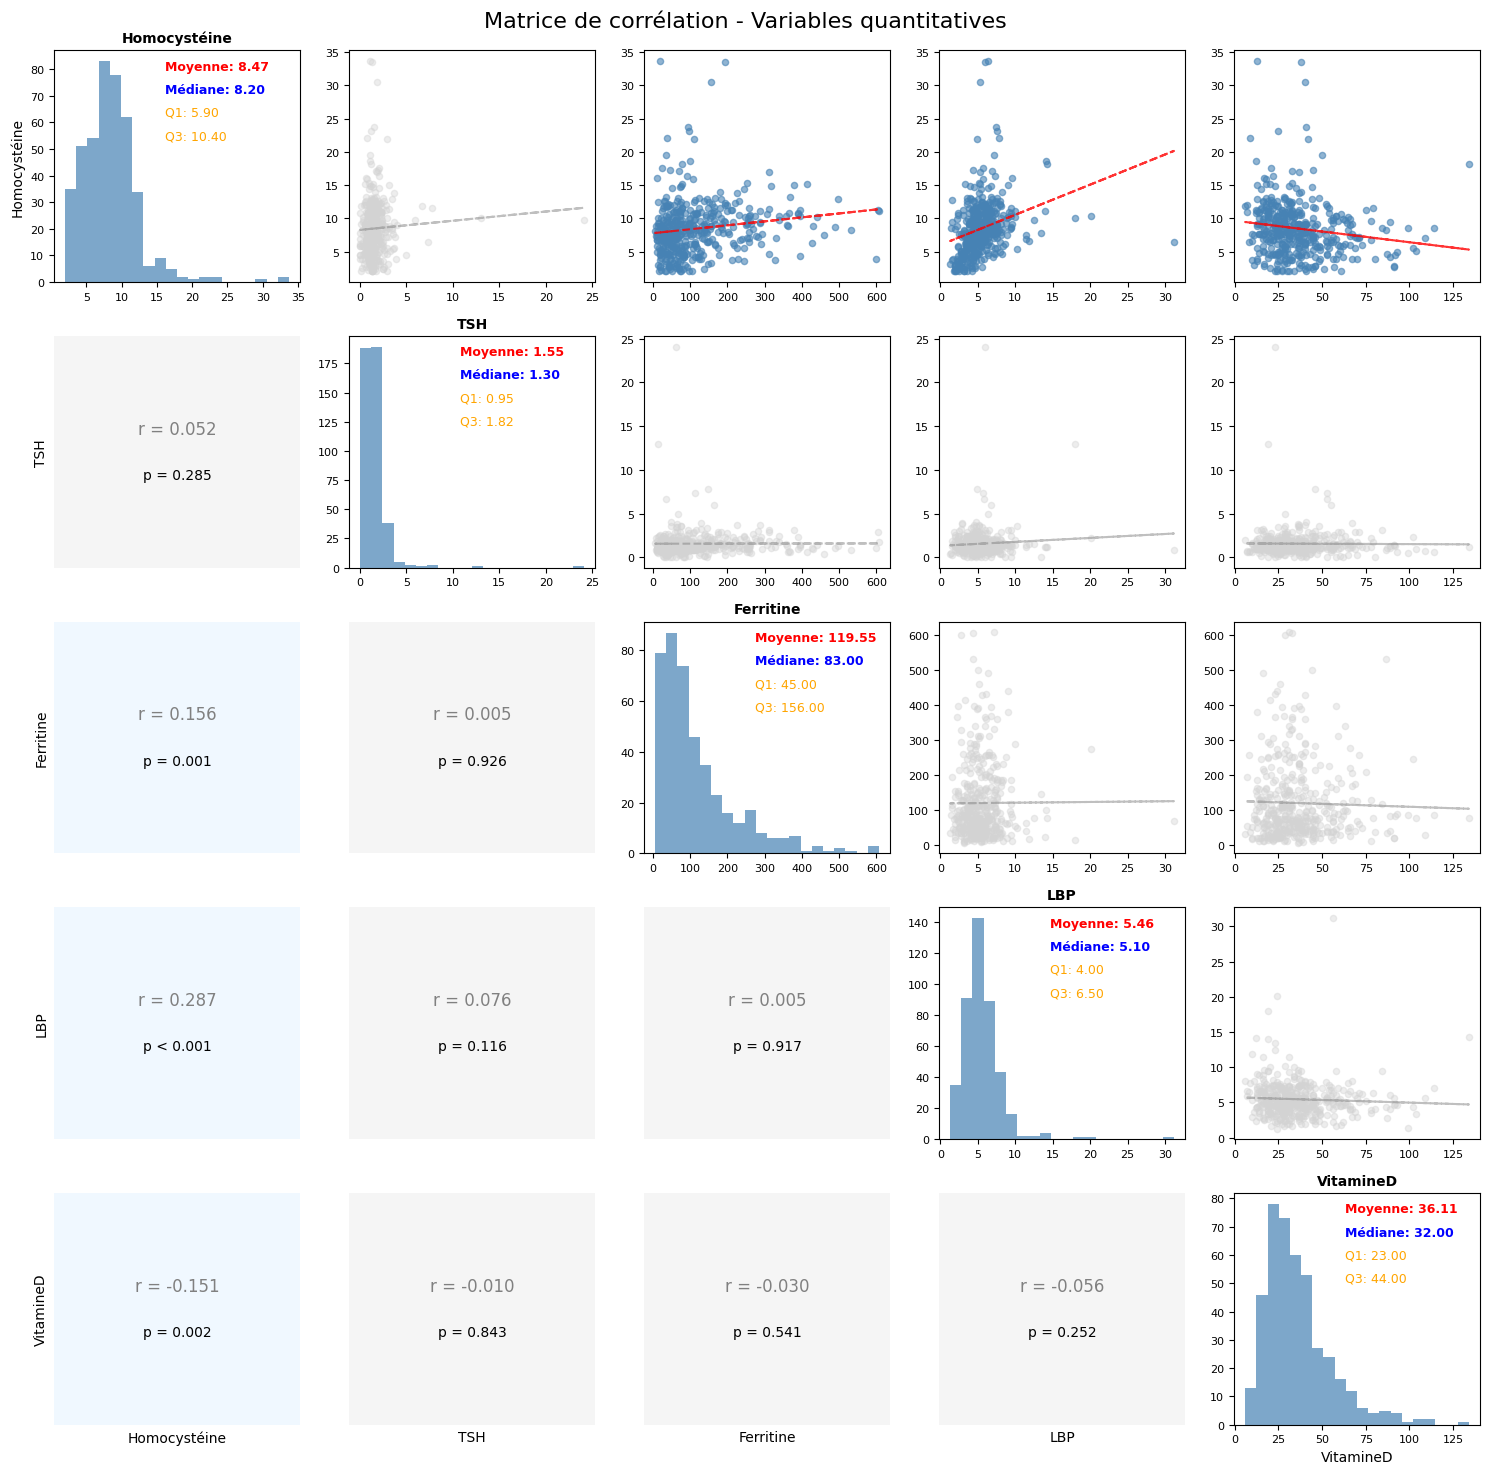

In [86]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr

# Vos 5 variables
variables = ['Homocystéine', 'TSH', 'Ferritine', 'LBP', 'VitamineD']
n_vars = len(variables)

# Créer la matrice de subplots
fig, axes = plt.subplots(n_vars, n_vars, figsize=(15, 15))
plt.subplots_adjust(hspace=15, wspace=0.1)  # Ajustez ces valeurs selon vos besoins

fig.suptitle('Matrice de corrélation - Variables quantitatives', fontsize=16)

for i in range(n_vars):
    for j in range(n_vars):
        ax = axes[i, j]
        
        if i == j:
            data = df[variables[i]].dropna()
            
            # Créer l'histogramme
            ax.hist(data, bins=20, alpha=0.7, color='steelblue')
            ax.set_title(f'{variables[i]}', fontsize=10, fontweight='bold')
            
            # Calculer les statistiques
            mean_val = data.mean()
            median_val = data.median()
            q1 = data.quantile(0.25)
            q3 = data.quantile(0.75)
            pos_x = 0.45
            pos_y = 0.96
            # Ajouter seulement les valeurs textuelles (sans lignes)
            ax.text(pos_x, pos_y, f'Moyenne: {mean_val:.2f}', 
                   transform=ax.transAxes, fontsize=9, 
                   color='red', fontweight='bold', va='top')
            
            ax.text(pos_x, pos_y - 0.1, f'Médiane: {median_val:.2f}', 
                   transform=ax.transAxes, fontsize=9, 
                   color='blue', fontweight='bold', va='top')
            
            ax.text(pos_x, pos_y - 0.2, f'Q1: {q1:.2f}', 
                   transform=ax.transAxes, fontsize=9, 
                   color='orange', va='top')
            
            ax.text(pos_x, pos_y - 0.3, f'Q3: {q3:.2f}', 
                   transform=ax.transAxes, fontsize=9, 
                   color='orange', va='top')
        elif i > j:
            # Triangle inférieur: coefficients de corrélation et p-values
            
            # Calculer la corrélation et p-value
            correlation, p_value = pearsonr(df[variables[j]], df[variables[i]])
            
            # Enlever tous les éléments visuels
            ax.set_xticks([])
            ax.set_yticks([])
            ax.spines['top'].set_visible(False)
            ax.spines['right'].set_visible(False)
            ax.spines['bottom'].set_visible(False)
            ax.spines['left'].set_visible(False)
            
            # Couleur selon la force de la corrélation
            if abs(correlation) >= 0.7:
                color = 'darkgreen'
                weight = 'bold'
            elif abs(correlation) >= 0.5:
                color = 'orange'
                weight = 'bold'
            elif abs(correlation) >= 0.3:
                color = 'red'
                weight = 'normal'
            else:
                color = 'gray'
                weight = 'normal'
            
            # Afficher le coefficient de corrélation
            ax.text(0.5, 0.6, f'r = {correlation:.3f}', 
                   ha='center', va='center', fontsize=12, 
                   color=color, weight=weight, transform=ax.transAxes)
            
            # Afficher la p-value
            if p_value < 0.001:
                p_text = 'p < 0.001'
            else:
                p_text = f'p = {p_value:.3f}'
                
            ax.text(0.5, 0.4, p_text, 
                   ha='center', va='center', fontsize=10, 
                   color='black', transform=ax.transAxes)
            
            # Ajouter un fond coloré selon la significativité
            if p_value < 0.05:
                ax.set_facecolor('#f0f8ff')  # Bleu très clair pour significatif
            else:
                ax.set_facecolor("whitesmoke")  # Rouge très clair pour non significatif
                
        else:
            # Triangle supérieur: scatterplot (i < j)
            correlation, p_value = pearsonr(df[variables[j]], df[variables[i]])

            # Couleur selon la significativité
            if p_value < 0.05:
                scatter_color = 'steelblue'  # Bleu pour significatif
                line_color = 'red'
                alpha_scatter = 0.6
                alpha_line = 0.8
            else:
                scatter_color = 'lightgray'  # Gris clair pour non significatif
                line_color = 'gray'
                alpha_scatter = 0.4
                alpha_line = 0.5
            
            ax.scatter(df[variables[j]], df[variables[i]], 
                      alpha=alpha_scatter, s=20, color=scatter_color)
            
            # Ajouter ligne de régression avec couleur conditionnelle
            z = np.polyfit(df[variables[j]], df[variables[i]], 1)
            p = np.poly1d(z)
            ax.plot(df[variables[j]], p(df[variables[j]]), 
                   color=line_color, linestyle='--', alpha=alpha_line)
        
        
        # Labels seulement pour les bords
        if i == n_vars - 1:  # Dernière ligne
            ax.set_xlabel(variables[j], fontsize=10)
        if j == 0:  # Première colonne
            ax.set_ylabel(variables[i], fontsize=10)
        
        # Nettoyer les axes pour tous sauf le triangle inférieur
        if not (i > j):
            ax.tick_params(labelsize=8)

plt.tight_layout()
plt.savefig('matrice_chart.png')

plt.show()

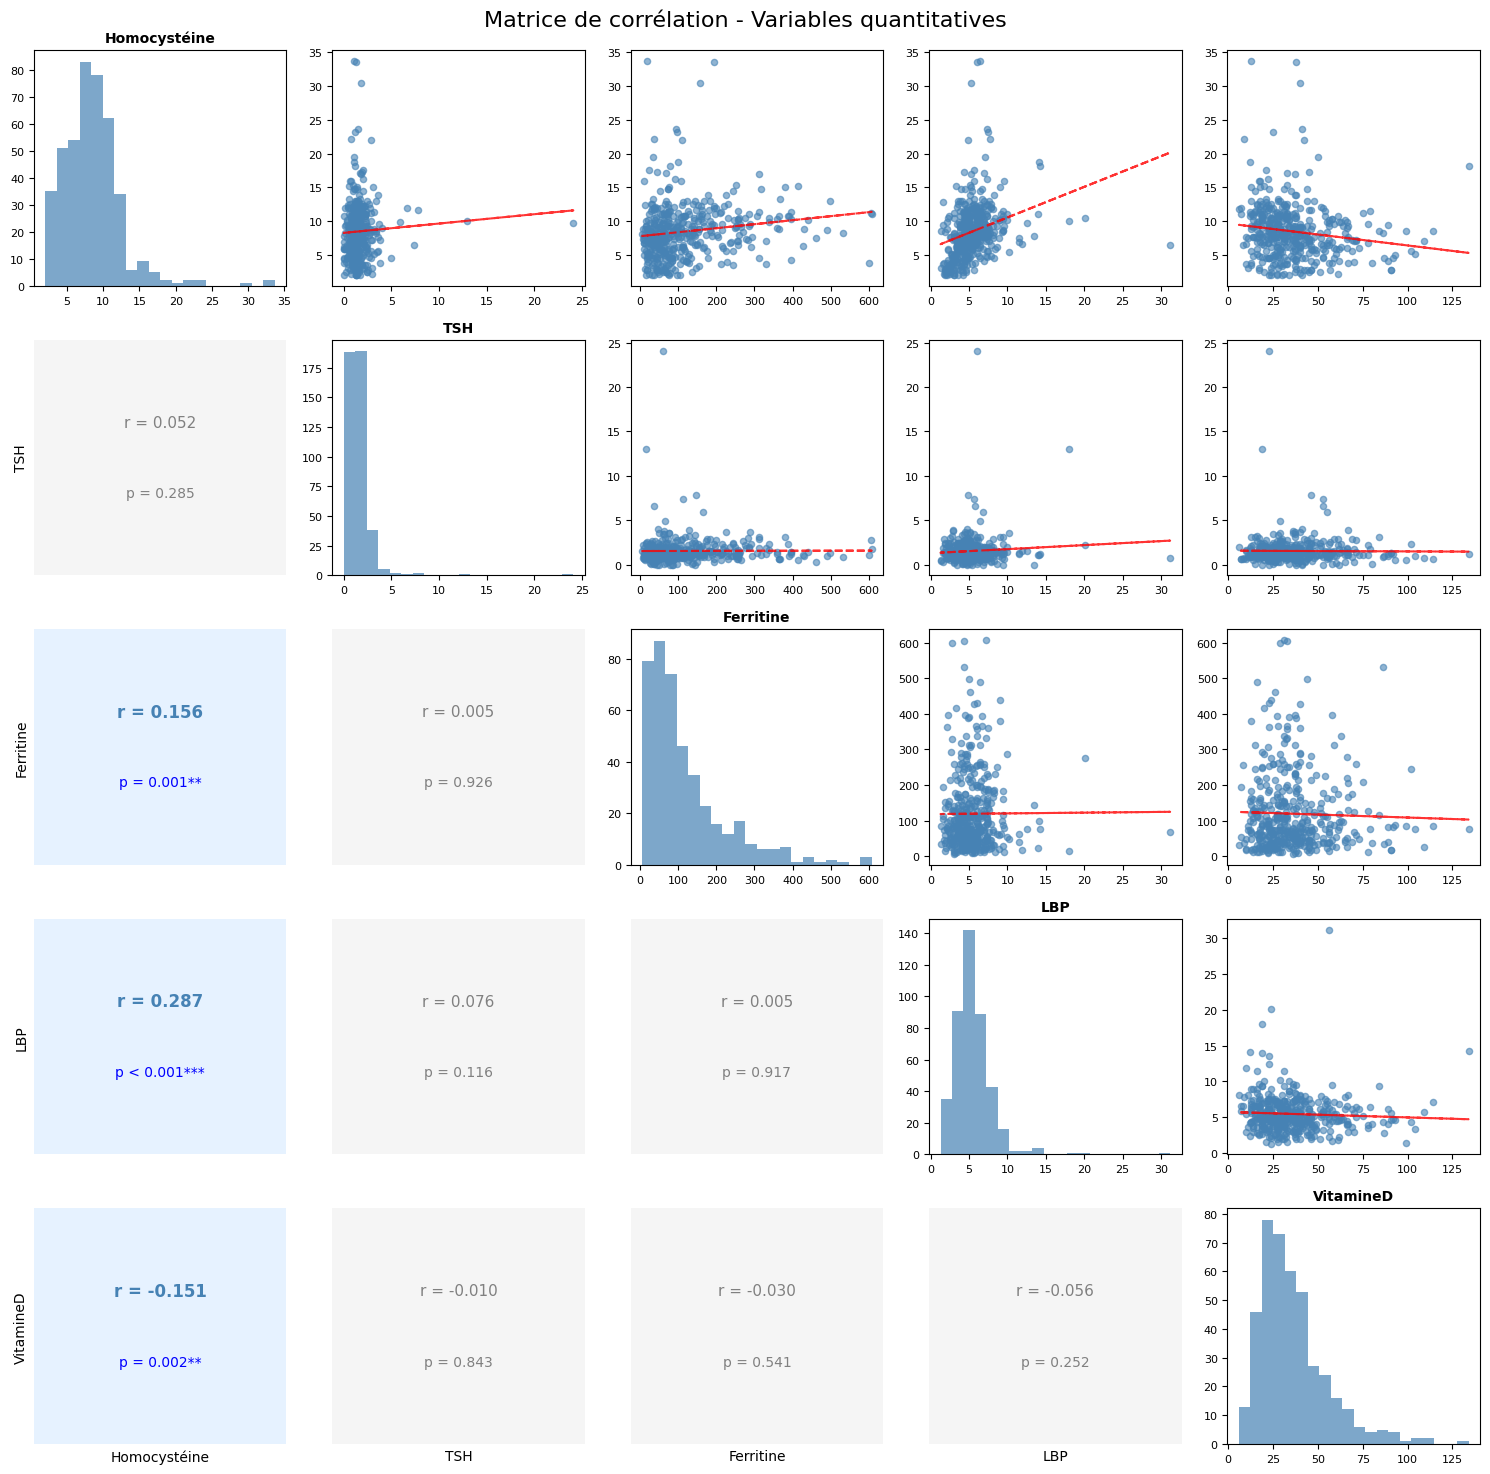

In [6]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr

# Vos 5 variables
variables = ['Homocystéine', 'TSH', 'Ferritine', 'LBP', 'VitamineD']
n_vars = len(variables)

# Créer la matrice de subplots
fig, axes = plt.subplots(n_vars, n_vars, figsize=(15, 15))
fig.suptitle('Matrice de corrélation - Variables quantitatives', fontsize=16)

for i in range(n_vars):
    for j in range(n_vars):
        ax = axes[i, j]
        
        if i == j:
            # Diagonale: histogramme
            ax.hist(df[variables[i]], bins=20, alpha=0.7, color='steelblue')
            ax.set_title(f'{variables[i]}', fontsize=10, fontweight='bold')
            
        elif i > j:
            # Triangle inférieur: corrélations
            
            # Calculer corrélation et p-value
            correlation, p_value = pearsonr(df[variables[j]], df[variables[i]])
            
            # Complètement vider l'axe
            ax.clear()
            ax.set_xlim(0, 1)
            ax.set_ylim(0, 1)
            ax.set_xticks([])
            ax.set_yticks([])
            
            # Enlever toutes les bordures
            for spine in ax.spines.values():
                spine.set_visible(False)
            
            # Couleur selon la significativité
            if p_value < 0.05:
                # Significatif: différentes nuances de bleu selon la force
                if abs(correlation) >= 0.7:
                    corr_color = 'darkblue'
                    size = 14
                elif abs(correlation) >= 0.5:
                    corr_color = 'blue'
                    size = 13
                else:
                    corr_color = 'steelblue'
                    size = 12
                p_color = 'blue'
                bg_color = '#e6f2ff'  # Bleu très clair
                weight = 'bold'
            else:
                # Non significatif: gris
                corr_color = 'grey'
                p_color = 'grey'
                bg_color = '#f5f5f5'  # Gris très clair
                weight = 'normal'
                size = 11
            
            # Afficher corrélation
            ax.text(0.5, 0.65, f'r = {correlation:.3f}', 
                   ha='center', va='center', fontsize=size, 
                   color=corr_color, weight=weight)
            
            # Afficher p-value avec étoiles pour la significativité
            if p_value < 0.001:
                p_text = 'p < 0.001***'
            elif p_value < 0.01:
                p_text = f'p = {p_value:.3f}**'
            elif p_value < 0.05:
                p_text = f'p = {p_value:.3f}*'
            else:
                p_text = f'p = {p_value:.3f}'
                
            ax.text(0.5, 0.35, p_text, 
                   ha='center', va='center', fontsize=10, 
                   color=p_color)
            
            # Fond coloré selon significativité
            ax.set_facecolor(bg_color)
                
        else:
            # Triangle supérieur: scatterplot
            ax.scatter(df[variables[j]], df[variables[i]], 
                      alpha=0.6, s=20, color='steelblue')
            
            # Ligne de régression
            z = np.polyfit(df[variables[j]], df[variables[i]], 1)
            p = np.poly1d(z)
            ax.plot(df[variables[j]], p(df[variables[j]]), "r--", alpha=0.8)
        
        # Labels uniquement sur les bords
        if i == n_vars - 1 and i != j:  # Dernière ligne, pas diagonale
            ax.set_xlabel(variables[j], fontsize=10)
        if j == 0 and i != j:  # Première colonne, pas diagonale
            ax.set_ylabel(variables[i], fontsize=10)
        
        # Ajuster les ticks pour scatterplots et histogrammes
        if not (i > j):
            ax.tick_params(labelsize=8)

plt.tight_layout()
plt.show()